In [28]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
data=pd.read_csv("/content/drive/MyDrive/cleaned.csv")
data.head(5)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [30]:
print(data['Age_band_of_driver'].value_counts())
print(data['Sex_of_driver'].value_counts())
print(data['Educational_level'].value_counts())
print(data['Vehicle_driver_relation'].value_counts())
print(data['Driving_experience'].value_counts())
print(data['Lanes_or_Medians'].value_counts())
print(data['Road_surface_type'].value_counts())
print(data['Types_of_Junction'].value_counts())
print(data['Light_conditions'].value_counts())
print(data['Weather_conditions'].value_counts())
print(data['Type_of_collision'].value_counts())
print(data['Vehicle_movement'].value_counts())
print(data['Cause_of_accident'].value_counts())
print(data['Accident_severity'].value_counts())

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64
Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64
Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Unknown                841
Above high school      362
Writing & reading      176
Illiterate              45
Name: count, dtype: int64
Vehicle_driver_relation
Employee    9627
Owner       1973
Unknown      593
Other        123
Name: count, dtype: int64
Driving_experience
5-10yr        3363
2-5yr         2613
Above 10yr    2262
1-2yr         1756
Below 1yr     1342
Unknown        829
No Licence     118
unknown         33
Name: count, dtype: int64
Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                

In [54]:
le=LabelEncoder()
le.fit(data['Age_band_of_driver'])
data['Age_band_of_driver']=le.transform(data['Age_band_of_driver'])
le.fit(data['Sex_of_driver'])
data['Sex_of_driver']=le.transform(data['Sex_of_driver'])
le.fit(data['Educational_level'])
data['Educational_level']=le.transform(data['Educational_level'])
le.fit(data['Vehicle_driver_relation'])
data['Vehicle_driver_relation']=le.transform(data['Vehicle_driver_relation'])
le.fit(data['Driving_experience'])
data['Driving_experience']=le.transform(data['Driving_experience'])
le.fit(data['Lanes_or_Medians'])
data['Lanes_or_Medians']=le.transform(data['Lanes_or_Medians'])
le.fit(data['Road_surface_type'])
data['Road_surface_type']=le.transform(data['Road_surface_type'])
le.fit(data['Types_of_Junction'])
data['Types_of_Junction']=le.transform(data['Types_of_Junction'])
le.fit(data['Light_conditions'])
data['Light_conditions']=le.transform(data['Light_conditions'])
le.fit(data['Weather_conditions'])
data['Weather_conditions']=le.transform(data['Weather_conditions'])
le.fit(data['Type_of_collision'])
data['Type_of_collision']=le.transform(data['Type_of_collision'])
le.fit(data['Vehicle_movement'])
data['Vehicle_movement']=le.transform(data['Vehicle_movement'])
le.fit(data['Cause_of_accident'])
data['Cause_of_accident']=le.transform(data['Cause_of_accident'])
le.fit(data['Accident_severity'])
data['Accident_severity']=le.transform(data['Accident_severity'])
le.fit(data['Pedestrian_movement'])
data['Pedestrian_movement']=le.transform(data['Pedestrian_movement'])
data.head(5)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,1,0,0,0,5,1,0,3,2,3,2,5,9,2
1,1,1,4,0,3,4,1,0,3,2,8,2,5,16,2
2,0,1,4,0,0,6,1,0,3,2,2,2,5,0,1
3,0,1,4,0,2,6,7,2,0,2,8,2,5,1,2
4,0,1,4,0,1,6,7,0,0,2,8,2,5,16,2


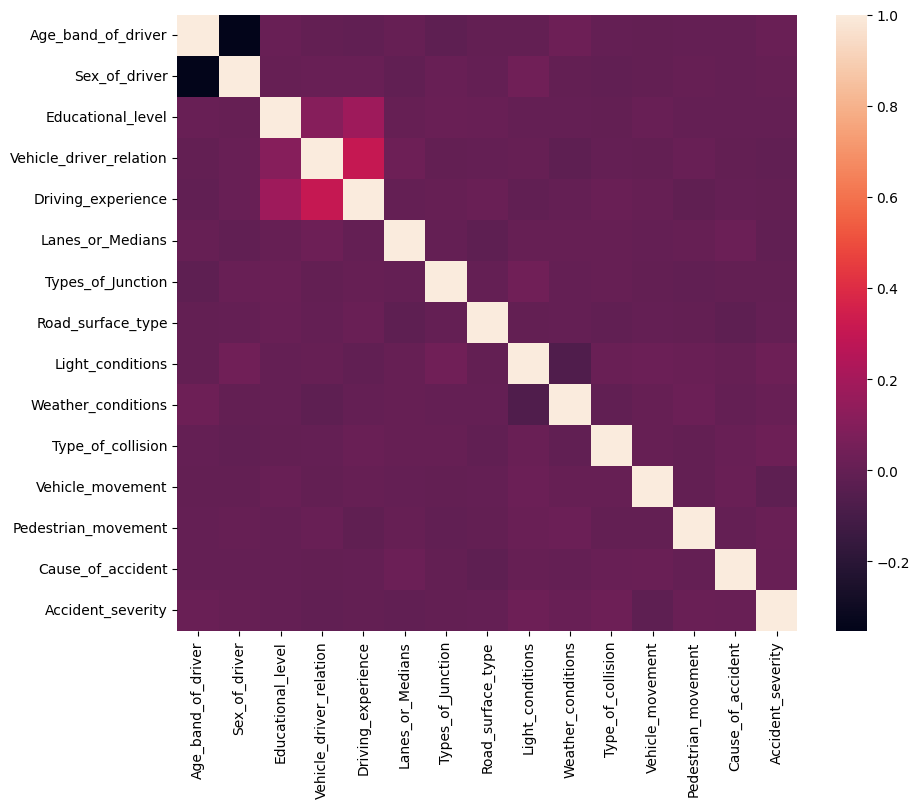

In [32]:
correlation_matrix = data.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix)
plt.show()

In [33]:
d=data.iloc[:,0:13]
y=data.iloc[:,-1]

In [34]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(d)
df=pd.DataFrame(x,columns=d.columns)
df['Accident_severity']=y
df.head(5)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Accident_severity
0,-0.966718,0.161001,-2.308049,-0.512423,-1.377891,1.123629,-0.836406,-0.276205,0.621167,-0.362059,-1.246631,-0.451752,0.183458,2
1,-0.219035,0.161001,0.516537,-0.512423,0.487776,0.550198,-0.836406,-0.276205,0.621167,-0.362059,0.590528,-0.451752,0.183458,2
2,-0.966718,0.161001,0.516537,-0.512423,-1.377891,1.697060,-0.836406,-0.276205,0.621167,-0.362059,-1.614062,-0.451752,0.183458,1
3,-0.966718,0.161001,0.516537,-0.512423,-0.134113,1.697060,1.177706,1.953717,-1.644466,-0.362059,0.590528,-0.451752,0.183458,2
4,-0.966718,0.161001,0.516537,-0.512423,-0.756002,1.697060,1.177706,-0.276205,-1.644466,-0.362059,0.590528,-0.451752,0.183458,2


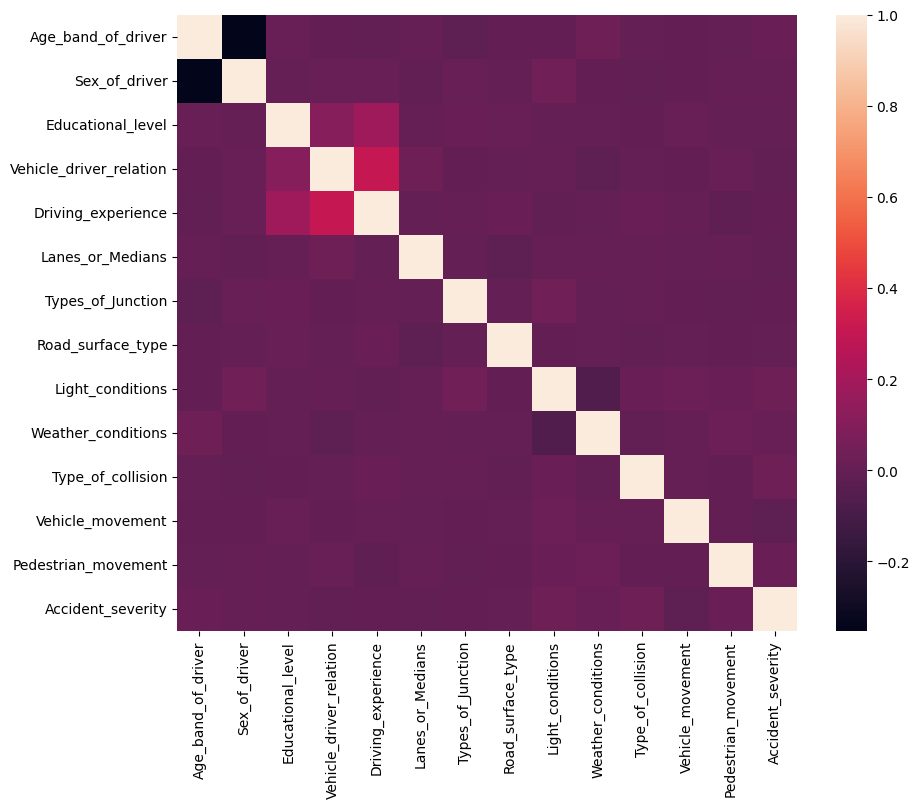

In [35]:
correlation_matrix = df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix)
plt.show()
d=df.iloc[:,0:13]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(d, y, test_size=0.1, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [45]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = model.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%') #the accuracy with or without standard classifier was the same

ROC AUC Score: 0.5416781097931809
Accuracy: 82.06%


In [47]:
print(f"{classification_report(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.15      0.03      0.05       183
           2       0.84      0.97      0.90      1036

    accuracy                           0.82      1232
   macro avg       0.33      0.33      0.32      1232
weighted avg       0.73      0.82      0.76      1232



In [48]:
feature_importance = pd.DataFrame({"Feature": d.columns, "Importance": model.feature_importances_})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)

                    Feature  Importance
8          Light_conditions    0.083457
3   Vehicle_driver_relation    0.082482
6         Types_of_Junction    0.082428
0        Age_band_of_driver    0.080324
11         Vehicle_movement    0.079712
2         Educational_level    0.078187
9        Weather_conditions    0.077896
1             Sex_of_driver    0.076492
5          Lanes_or_Medians    0.076314
10        Type_of_collision    0.075712
4        Driving_experience    0.075513
7         Road_surface_type    0.070810
12      Pedestrian_movement    0.060672


In [49]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(X_train,y_train)
y_pred2=lg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 84.09%


In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = lg.predict_proba(X_test)
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f"ROC AUC Score: {roc_auc}")
print(f"{classification_report(y_test, y_pred)}")

ROC AUC Score: 0.5460502435339096
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.15      0.03      0.05       183
           2       0.84      0.97      0.90      1036

    accuracy                           0.82      1232
   macro avg       0.33      0.33      0.32      1232
weighted avg       0.73      0.82      0.76      1232



In [51]:
import numpy as np
coefficients = pd.DataFrame({"Feature": d.columns, "Coefficient": lg.coef_[0]})
coefficients["Odds Ratio"] = np.exp(coefficients["Coefficient"])
print(coefficients)
#if coefficient is positive, it is odds ratio times less likely, if negative then that many times less likely

                    Feature  Coefficient  Odds Ratio
0        Age_band_of_driver    -0.147738    0.862657
1             Sex_of_driver    -0.014781    0.985327
2         Educational_level     0.058031    1.059748
3   Vehicle_driver_relation     0.108995    1.115156
4        Driving_experience    -0.113445    0.892753
5          Lanes_or_Medians     0.084766    1.088463
6         Types_of_Junction    -0.013993    0.986105
7         Road_surface_type    -0.120904    0.886119
8          Light_conditions    -0.210764    0.809965
9        Weather_conditions    -0.114906    0.891450
10        Type_of_collision    -0.092699    0.911468
11         Vehicle_movement    -0.018713    0.981461
12      Pedestrian_movement    -0.019209    0.980974


In [ ]:
# import numpy as np

# def grey_whitening_weight(x, a, b):
#     """
#     Grey Whitening Weighting Function
#     :param x: input value or array
#     :param a: lower threshold
#     :param b: upper threshold
#     :return: whitened weight(s)
#     """
#     x = np.array(x)
#     result = np.where(x <= a, 0, np.where(x >= b, 1, (x - a) / (b - a)))
#     return result

# Example usage
# x_values = np.linspace(0, 10, 100)
# weights = grey_whitening_weight(x_values, a=3, b=7)

#  Plotting (optional)
# import matplotlib.pyplot as plt

# plt.plot(x_values, weights)
# plt.xlabel("Input x")
# plt.ylabel("Whitened Weight")
# plt.title("Grey Whitening Weighting Function")
# plt.grid(True)
# plt.show()
